In [1]:
import pandas as pd
import numpy as np
 
# importing pyplot from matplotlib as plt
# for plotting graphs
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [2]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [3]:
tables = pd.read_html(url, index_col='terrestrial_date')
tables

[                    id   sol   ls  month  min_temp  pressure
 terrestrial_date                                            
 2012-08-16           2    10  155      6     -75.0     739.0
 2012-08-17          13    11  156      6     -76.0     740.0
 2012-08-18          24    12  156      6     -76.0     741.0
 2012-08-19          35    13  157      6     -74.0     732.0
 2012-08-20          46    14  157      6     -74.0     740.0
 ...                ...   ...  ...    ...       ...       ...
 2018-02-23        1889  1973  133      5     -78.0     730.0
 2018-02-24        1892  1974  134      5     -77.0     729.0
 2018-02-25        1894  1975  134      5     -76.0     729.0
 2018-02-26        1893  1976  135      5     -77.0     728.0
 2018-02-27        1895  1977  135      5     -77.0     727.0
 
 [1867 rows x 6 columns]]

In [4]:
type(tables)

list

In [5]:
dftable = tables[0]
dftable.head()

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2012-08-16,2,10,155,6,-75.0,739.0
2012-08-17,13,11,156,6,-76.0,740.0
2012-08-18,24,12,156,6,-76.0,741.0
2012-08-19,35,13,157,6,-74.0,732.0
2012-08-20,46,14,157,6,-74.0,740.0


In [6]:
dftable.dtypes

id            int64
sol           int64
ls            int64
month         int64
min_temp    float64
pressure    float64
dtype: object

In [7]:
dftable['min_temp']=dftable['min_temp'].astype(int)

In [8]:
dftable.dtypes

id            int64
sol           int64
ls            int64
month         int64
min_temp      int64
pressure    float64
dtype: object

In [13]:
dftable['pressure']=dftable['pressure'].astype(int)

In [15]:
dftable.dtypes

id          int64
sol         int64
ls          int64
month       int64
min_temp    int64
pressure    int64
dtype: object

In [16]:
dftable

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2012-08-16,2,10,155,6,-75,739
2012-08-17,13,11,156,6,-76,740
2012-08-18,24,12,156,6,-76,741
2012-08-19,35,13,157,6,-74,732
2012-08-20,46,14,157,6,-74,740
...,...,...,...,...,...,...
2018-02-23,1889,1973,133,5,-78,730
2018-02-24,1892,1974,134,5,-77,729
2018-02-25,1894,1975,134,5,-76,729


# Questions

## How many months exist on Mars? 
### 12

## How many Martian (and not Earth) days worth of data exist in the scraped dataset?
### 1867 days

In [17]:
len(dftable)

1867

## What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

In [18]:
# updating our dataFrame to have only
# using .to_frame() to convert pandas series
# into dataframe.
dftablemin = dftable['min_temp'].to_frame()
 
# calculating simple moving average
# with window size = 30
dftablemin['average'] = dftablemin['min_temp'].rolling(30).mean()
 
# removing all the NULL values using
# dropna() method
dftablemin.dropna(inplace=True)
 
# printing Dataframe
dftablemin

,min_temp,average
terrestrial_date,,
2012-09-19,-74,-74.666667
2012-09-20,-75,-74.666667
2012-09-21,-74,-74.600000
2012-09-22,-74,-74.533333
2012-09-23,-75,-74.566667
...,...,...
2018-02-23,-78,-77.600000
2018-02-24,-77,-77.500000
2018-02-25,-76,-77.433333


<AxesSubplot:xlabel='terrestrial_date'>

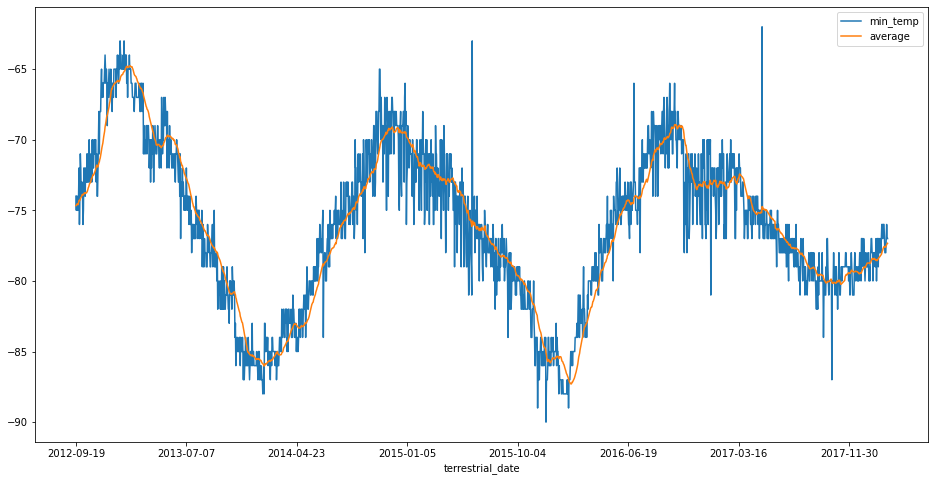

In [19]:

dftablemin[['min_temp', 'average']].plot(label='dftable',
                                  figsize=(16, 8))

## Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

In [20]:
# updating our dataFrame to have only
# using .to_frame() to convert pandas series
# into dataframe.
dftablepressure = dftable['pressure'].to_frame()
 
# calculating simple moving average
# with window size = 30
dftablepressure['average'] = dftablepressure['pressure'].rolling(30).mean()
 
# removing all the NULL values using
# dropna() method
dftablepressure.dropna(inplace=True)
 
# printing Dataframe
dftablepressure

,pressure,average
terrestrial_date,,
2012-09-19,756,745.233333
2012-09-20,757,745.833333
2012-09-21,758,746.433333
2012-09-22,758,747.000000
2012-09-23,758,747.866667
...,...,...
2018-02-23,730,741.600000
2018-02-24,729,740.733333
2018-02-25,729,739.900000


<AxesSubplot:xlabel='terrestrial_date'>

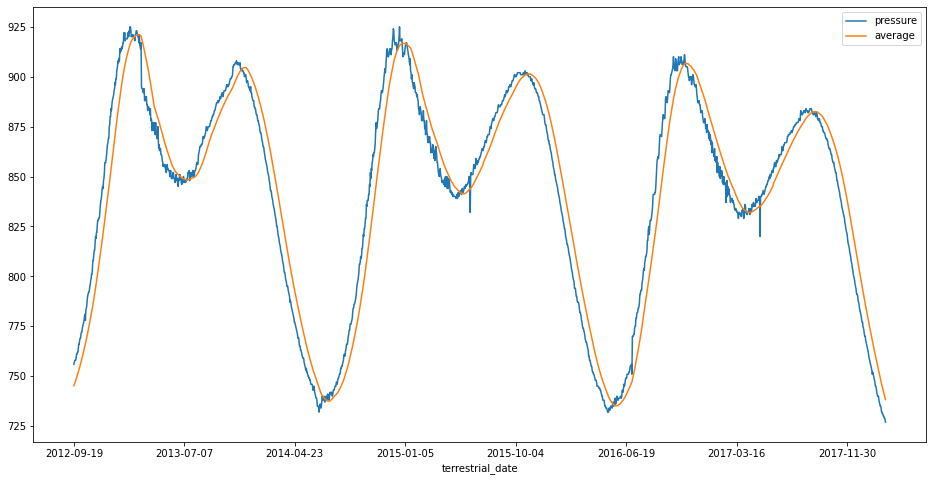

In [21]:
dftablepressure[['pressure', 'average']].plot(label='dftable',
                                  figsize=(16, 8))

## About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

In [23]:
# updating our dataFrame to have only
# using .to_frame() to convert pandas series
# into dataframe.
dftabledays = dftable['min_temp'].to_frame()
 
dftabledays

,min_temp
terrestrial_date,
2012-08-16,-75
2012-08-17,-76
2012-08-18,-76
2012-08-19,-74
2012-08-20,-74
...,...
2018-02-23,-78
2018-02-24,-77
2018-02-25,-76


<AxesSubplot:xlabel='terrestrial_date'>

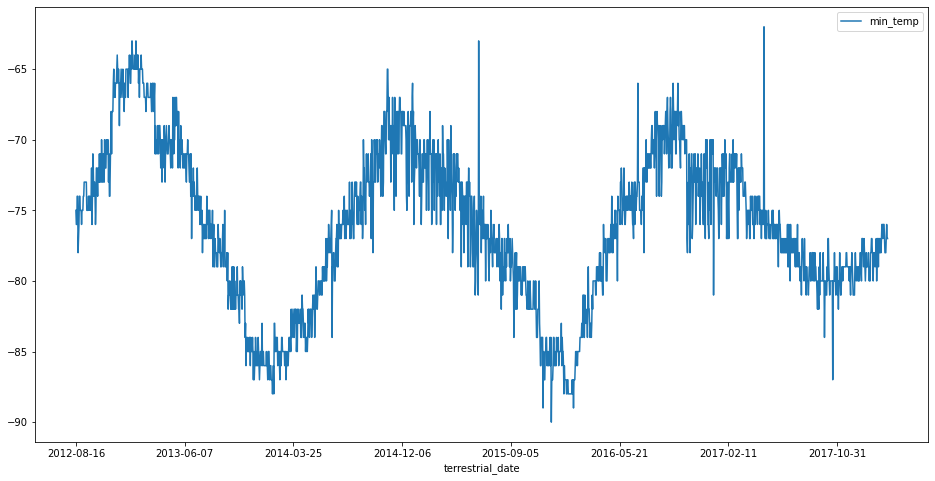

In [24]:
dftabledays[['min_temp']].plot(label='dftable',
                                  figsize=(16, 8))